## Coding Exercise #0301

### La Multicolinealidad en la Regresión Lineal

La multicolinealidad es un fenómeno en el que dos o más variables independientes en un modelo de regresión lineal están altamente correlacionadas entre sí. Esto significa que una variable independiente puede ser predicha en gran medida por otra(s) variable(s) independiente(s). La multicolinealidad puede afectar negativamente la interpretación y la estabilidad del modelo de regresión lineal.

#### ¿Por qué la Multicolinealidad es Problemática?

- **Coeficientes de Regresión Inflados**: La presencia de multicolinealidad puede llevar a coeficientes de regresión que son extremadamente grandes o tienen signos contrarios a lo esperado. Esto se debe a que el modelo tiene dificultades para distinguir el efecto individual de cada variable independiente.
- **Inestabilidad de los Coeficientes**: Los coeficientes de regresión pueden ser muy sensibles a pequeños cambios en los datos. Esto significa que una ligera modificación en los datos de entrenamiento puede resultar en grandes cambios en los coeficientes estimados.
- **Dificultad en la Interpretación**: Con alta multicolinealidad, es difícil determinar el efecto individual de cada variable independiente sobre la variable dependiente porque sus efectos están mezclados.
- **Aumento de la Varianza de los Coeficientes**: La varianza de los coeficientes de las variables colineales se incrementa, lo que reduce la precisión de las estimaciones y puede llevar a intervalos de confianza más amplios.
- **Impacto en las Predicciones**: Aunque la multicolinealidad no afecta la capacidad predictiva del modelo de manera directa, sí puede hacer que las predicciones sean menos fiables y más sensibles a cambios en los datos.

#### Identificación de la Multicolinealidad

Existen varias maneras de detectar la multicolinealidad:

- **Matriz de Correlación**: Calcular la matriz de correlación de las variables independientes. Correlaciones altas (cercanas a 1 o -1) entre dos variables indican posible multicolinealidad.
- **Factor de Inflación de la Varianza (VIF)**: El VIF mide cuánto aumenta la varianza de un coeficiente estimado debido a la multicolinealidad. Un VIF mayor a 10 (algunos usan un umbral más bajo, como 5) indica una alta multicolinealidad.


In [27]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Generar datos de ejemplo
np.random.seed(0)
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

# Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Ajustar el modelo de regresión lineal
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
y_pred = lin_reg.predict(X_test)

# Calcular los residuos
residuals = y_test - y_pred

In [29]:
print(residuals)

[[-0.10529835]
 [-0.17252161]
 [-0.25555861]
 [-0.3429095 ]
 [-0.88791823]
 [ 0.72914957]
 [-1.46783474]
 [-0.69817776]
 [-0.59409291]
 [-1.36079816]
 [-0.0642682 ]
 [ 1.66637279]
 [-1.02099525]
 [ 1.71479888]
 [ 0.72072493]
 [ 1.29016556]
 [ 0.92580532]
 [-1.28393005]
 [ 0.01300132]
 [ 0.71478793]]


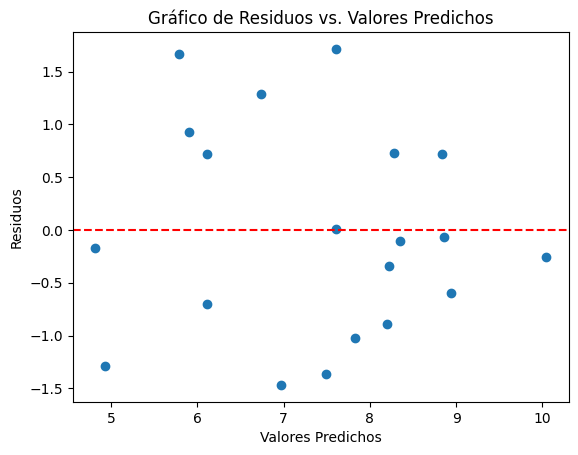

In [30]:
# Gráfico de Residuos vs. Valores Predichos
plt.scatter(y_pred, residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Valores Predichos')
plt.ylabel('Residuos')
plt.title('Gráfico de Residuos vs. Valores Predichos')
plt.show()

### Gráfico de Residuos vs. Valores Predichos:
Este gráfico ayuda a verificar si los residuos se distribuyen aleatoriamente alrededor de cero. La presencia de patrones indica posibles problemas con el modelo.

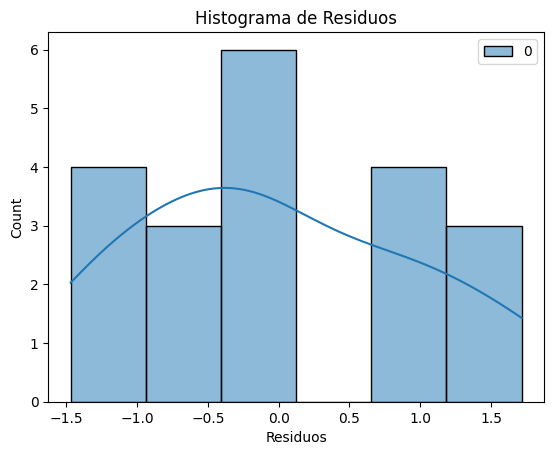

In [31]:
# Histograma de Residuos
sns.histplot(residuals, kde=True)
plt.xlabel('Residuos')
plt.title('Histograma de Residuos')
plt.show()

### Histograma de Residuos:
Un histograma de los residuos puede mostrar si estos siguen una distribución normal, lo cual es un supuesto común en la regresión lineal.



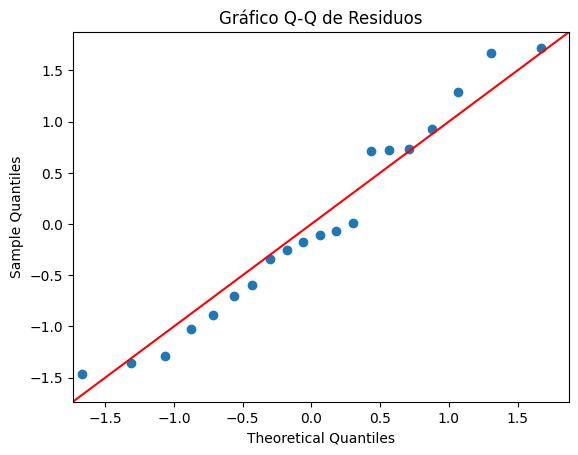

In [32]:
# Gráfico Q-Q de Residuos
sm.qqplot(residuals.flatten(), line='45')
plt.title('Gráfico Q-Q de Residuos')
plt.show()


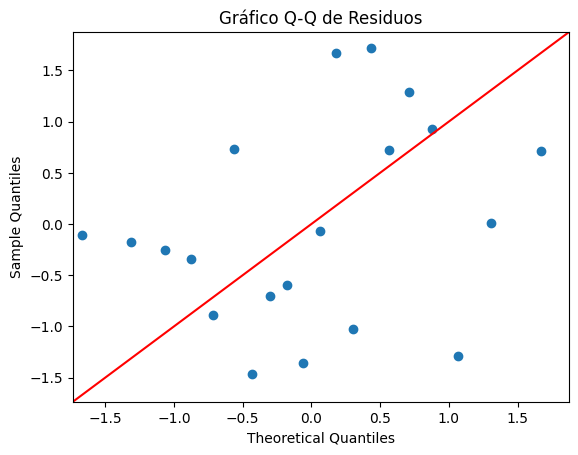

In [33]:
import statsmodels.api as sm

sm.qqplot(residuals, line='45')
plt.title('Gráfico Q-Q de Residuos')
plt.show()


### Gráfico Q-Q (Quantile-Quantile):
Este gráfico compara la distribución de los residuos con una distribución normal. Si los residuos siguen una línea recta en el gráfico Q-Q, es probable que sigan una distribución normal.

### Prueba de Heterocedasticidad:
Para verificar si la varianza de los residuos es constante, se pueden realizar pruebas estadísticas como la prueba de Breusch-Pagan o la prueba de White.



In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = sns.load_dataset('mpg')

In [3]:
df

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,82,usa,ford mustang gl
394,44.0,4,97.0,52.0,2130,24.6,82,europe,vw pickup
395,32.0,4,135.0,84.0,2295,11.6,82,usa,dodge rampage
396,28.0,4,120.0,79.0,2625,18.6,82,usa,ford ranger


In [6]:
# Valores unicos de df origin
df.origin.unique()

array(['usa', 'japan', 'europe'], dtype=object)

In [5]:
# Valores unicos de df model_year
df.model_year.unique()

array([70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82])

In [4]:
# Valores unicos de df name
df.name.unique()

array(['chevrolet chevelle malibu', 'buick skylark 320',
       'plymouth satellite', 'amc rebel sst', 'ford torino',
       'ford galaxie 500', 'chevrolet impala', 'plymouth fury iii',
       'pontiac catalina', 'amc ambassador dpl', 'dodge challenger se',
       "plymouth 'cuda 340", 'chevrolet monte carlo',
       'buick estate wagon (sw)', 'toyota corona mark ii',
       'plymouth duster', 'amc hornet', 'ford maverick', 'datsun pl510',
       'volkswagen 1131 deluxe sedan', 'peugeot 504', 'audi 100 ls',
       'saab 99e', 'bmw 2002', 'amc gremlin', 'ford f250', 'chevy c20',
       'dodge d200', 'hi 1200d', 'chevrolet vega 2300', 'toyota corona',
       'ford pinto', 'plymouth satellite custom', 'ford torino 500',
       'amc matador', 'pontiac catalina brougham', 'dodge monaco (sw)',
       'ford country squire (sw)', 'pontiac safari (sw)',
       'amc hornet sportabout (sw)', 'chevrolet vega (sw)',
       'pontiac firebird', 'ford mustang', 'mercury capri 2000',
       'opel 1900'

In [7]:
# drop df categorical
df.drop(['origin','model_year','name'],axis=1,inplace=True)

In [8]:
df

,mpg,cylinders,displacement,horsepower,weight,acceleration
0,18.0,8,307.0,130.0,3504,12.0
1,15.0,8,350.0,165.0,3693,11.5
2,18.0,8,318.0,150.0,3436,11.0
3,16.0,8,304.0,150.0,3433,12.0
4,17.0,8,302.0,140.0,3449,10.5
...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6
394,44.0,4,97.0,52.0,2130,24.6
395,32.0,4,135.0,84.0,2295,11.6
396,28.0,4,120.0,79.0,2625,18.6


In [9]:
df.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration
count,398.000000,398.000000,398.000000,392.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.469388,2970.424623,15.568090
std,7.815984,1.701004,104.269838,38.491160,846.841774,2.757689
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000
25%,17.500000,4.000000,104.250000,75.000000,2223.750000,13.825000
50%,23.000000,4.000000,148.500000,93.500000,2803.500000,15.500000
75%,29.000000,8.000000,262.000000,126.000000,3608.000000,17.175000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000


In [11]:
# split de datos
X = df.drop('mpg',axis=1)
y = df['mpg']

In [12]:
# train_test_split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2024)

### 1. Linear regression with 'Galton' data:

In [13]:
import os
from sklearn.linear_model import LinearRegression
%matplotlib inline

#### 1.1. Read in data and visualize:

In [ ]:
# Vaya al directorio donde se encuentra el archivo de datos.
# os.chdir(r'~~') # Por favor, reemplace la ruta con la suya.

In [18]:
!wget https://github.com/davidlealo/sic_ai_2024/blob/main/004_machine_learning/chapter_5/data_galton.csv

--2024-08-07 00:03:09--  https://github.com/davidlealo/sic_ai_2024/blob/main/004_machine_learning/chapter_5/data_galton.csv
Resolving github.com (github.com)... 140.82.116.4
Connecting to github.com (github.com)|140.82.116.4|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: ‘data_galton.csv’

data_galton.csv         [ <=>                ] 321.96K  --.-KB/s    in 0.03s   

2024-08-07 00:03:09 (10.0 MB/s) - ‘data_galton.csv’ saved [329683]



In [35]:
!wget https://raw.githubusercontent.com/davidlealo/sic_ai_2024/main/004_machine_learning/chapter_5/data_galton.csv

--2024-08-07 00:39:03--  https://raw.githubusercontent.com/davidlealo/sic_ai_2024/main/004_machine_learning/chapter_5/data_galton.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10186 (9.9K) [text/plain]
Saving to: ‘data_galton.csv’

data_galton.csv     100%[===================>]   9.95K  --.-KB/s    in 0s      

2024-08-07 00:39:03 (79.7 MB/s) - ‘data_galton.csv’ saved [10186/10186]



In [36]:
df = pd.read_csv('data_galton.csv', header='infer')

In [37]:
df.head()

,child,parent
0,61.7,70.5
1,61.7,68.5
2,61.7,65.5
3,61.7,64.5
4,61.7,64.0


In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 928 entries, 0 to 927
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   child   928 non-null    float64
 1   parent  928 non-null    float64
dtypes: float64(2)
memory usage: 14.6 KB


In [39]:
df.describe()

,child,parent
count,928.000000,928.000000
mean,68.088470,68.308190
std,2.517941,1.787333
min,61.700000,64.000000
25%,66.200000,67.500000
50%,68.200000,68.500000
75%,70.200000,69.500000
max,73.700000,73.000000


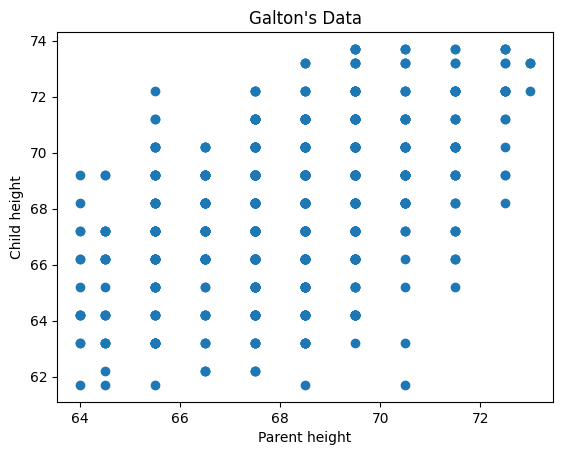

In [49]:
# Scatter plot de df
plt.scatter(df.parent,df.child)
plt.xlabel('Parent height')
plt.ylabel('Child height')
plt.title("Galton's Data")
plt.show()

In [40]:
# Hay muchos valores repetidos.
# Por lo tanto, los resumimos como una tabla cruzada.
myTable = pd.crosstab(df.parent,df.child)
myTable

child,61.7,62.2,63.2,64.2,65.2,66.2,67.2,68.2,69.2,70.2,71.2,72.2,73.2,73.7
parent,,,,,,,,,,,,,,
64.0,1,0,2,4,1,2,2,1,1,0,0,0,0,0
64.5,1,1,4,4,1,5,5,0,2,0,0,0,0,0
65.5,1,0,9,5,7,11,11,7,7,5,2,1,0,0
66.5,0,3,3,5,2,17,17,14,13,4,0,0,0,0
67.5,0,3,5,14,15,36,38,28,38,19,11,4,0,0
68.5,1,0,7,11,16,25,31,34,48,21,18,4,3,0
69.5,0,0,1,16,4,17,27,20,33,25,20,11,4,5
70.5,1,0,1,0,1,1,3,12,18,14,7,4,3,3
71.5,0,0,0,0,1,3,4,3,5,10,4,9,2,2


In [41]:
# Transforme la tabla cruzada para que pueda visualizarse como un diagrama de dispersión.
# Tamaño del punto = Frecuencia.
nrows = myTable.shape[0]
ncols = myTable.shape[1]
childHeights = list(myTable.columns)
parentHeights = list(myTable.index)
combo = [ (x,y,myTable.loc[x,y]) for x in parentHeights for y in childHeights]
combo = pd.DataFrame(combo, columns = ['x','y','freq'])

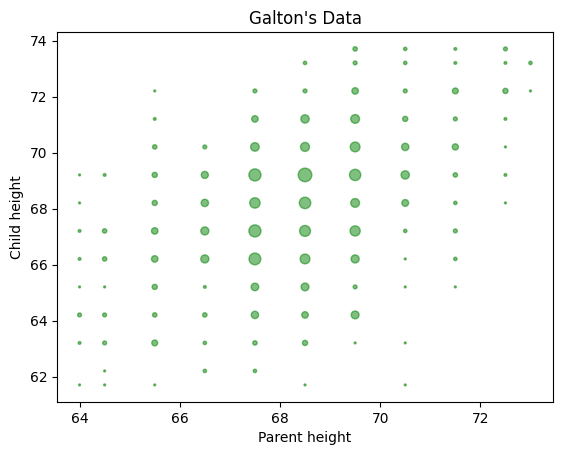

In [42]:
# Show the Scatter plot.
plt.scatter(combo.x, combo.y, s=combo.freq*2, c='green',alpha=0.5)
plt.xlabel('Parent height')
plt.ylabel('Child height')
plt.title("Galton's Data")
plt.show()

#### 1.2. Linear regression training:

In [43]:
# Instanciar un objeto de regresión lineal.
lm = LinearRegression(fit_intercept=True)

In [44]:
# Train.
lm.fit(df[['parent']],df[['child']])

LinearRegression()

In [45]:
# Show the intercept.
lm.intercept_

array([23.94153018])

In [46]:
# Show the slope (pendiente).
lm.coef_

array([[0.64629058]])

#### 1.3. Visualization of the regression line:

In [47]:
# Predicted Y.
predY = lm.predict(df[['parent']])

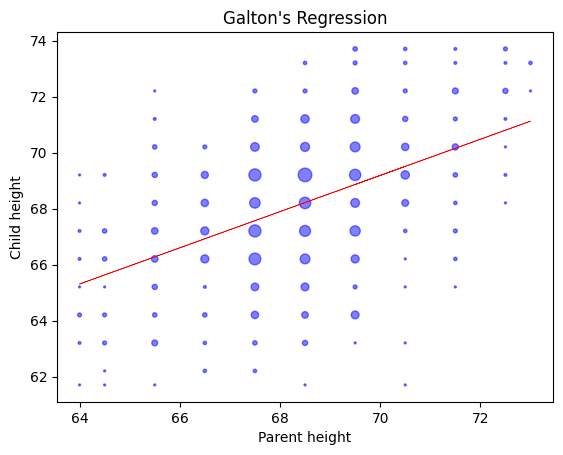

In [48]:
# Show the Scatter plot + Regression line.
plt.plot(df.parent.values,predY,c = 'red',linestyle='-',linewidth=0.5)
plt.scatter(combo.x, combo.y, s=combo.freq*2, c='blue',alpha=0.5)
plt.xlabel('Parent height')
plt.ylabel('Child height')
plt.title("Galton's Regression")
plt.show()

In [ ]:
# Quedamos en la 238